### Математика для Data Science.

#### Домашнее задание №1.

Загрузим датасет о ценах на дома в Бостоне.

In [17]:
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import cv2
import urllib.request
from urllib.request import urlopen
import math

boston = load_boston()
print(boston.data.shape)


(506, 13)


Каждый дом - это вектор в 13-мерном пространстве. Написать код для подсчета скалярного произведения двух первых домов из датасета.

In [37]:
x1 = boston.data[0] # дом 1
x2 = boston.data[1] # дом 2
np.dot(x1,x2)

234704.86490859918

In [38]:
def dot_product(v, w):
    """v1 * w1 + .. + vn * wn"""
    return sum(vi * wi for vi, wi in zip(v, w))
dot_product(x1, x2)

234704.86490859918

этап 2: взять два атрибута и посчитать скалярное произведение двух векторов (2 дома), начертить 2 дома как вектора в двухмерном пространстве, и сравниваем графически и через скалярное произведение.

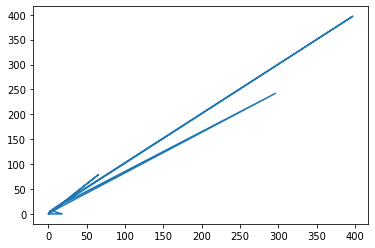

In [58]:
x1 = boston.data[0] # дом 1
x2 = boston.data[1] # дом 2
plt.plot(x1, x2)

Нарисовать два дома в 3-мерном пространстве (атрибуты выбрать самостоятельно)

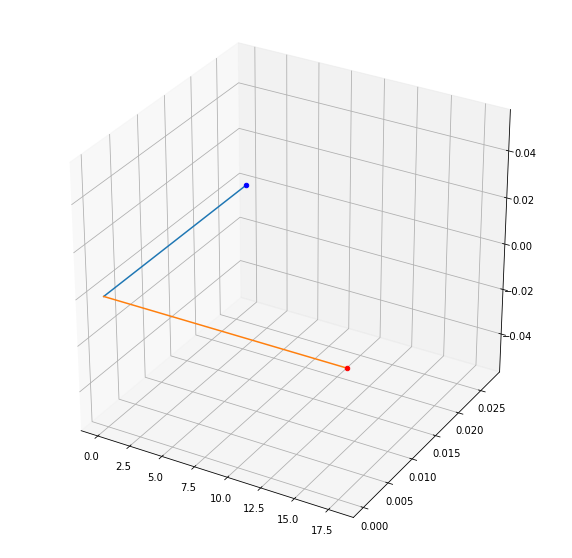

In [64]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

x1 = boston.data[0] # дом 1
x2 = boston.data[1] # дом 2

ax.plot([0,x1[0]], [0,x2[0]])
ax.plot([0,x1[1]], [0,x2[1]])

ax.scatter(x1[0], x2[0], c='b', marker='o')
ax.scatter(x1[1], x2[1], c='r', marker='o')

plt.show()

Найти косинус угла между векторами x1 и x2, где x1 и x2 - это два дома из 2ух атрибутов, полученных на этапе 2.

Найти расстояние между точками x1 и x2.

In [23]:
x1 = boston.data[0] # дом 1
x2 = boston.data[1] # дом 2

def unitVector(vector):
    return vector / np.linalg.norm(vector)
 
def angleBetween(x1, x2, deg = True):
    print('Первый вектор:', x1)
    print('Второй вектор:', x2)
 
    v1_u = MathCommon.unitVector(x1)
    v2_u = MathCommon.unitVector(x2)
 
    radians = np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))
    result = radians
 
    print('радианы:', result)
    if deg:
        result = np.degrees([radians.real])[0]  # переводим в градусы
 
    return result

print

In [30]:
x1 = boston.data[0] # дом 1
x2 = boston.data[1] # дом 2

v0 = np.array(x1) - np.array(x2)
v1 = np.array(x1) - np.array(x2)

angle = np.math.atan2(np.linalg.det([v0,v1]),np.dot(v0,v1))
print np.degrees(angle)

SyntaxError: invalid syntax (<ipython-input-30-93da49c94da5>, line 8)

###### перемудрил, не понимаю чет как написать решение.

## Задание повышенного уровня.

Задан объект в пространстве 2D. Изменить положение объекта (сместить по оси x на 300 пикселей, по оси y на 200 пикселей).

(-200, 200)

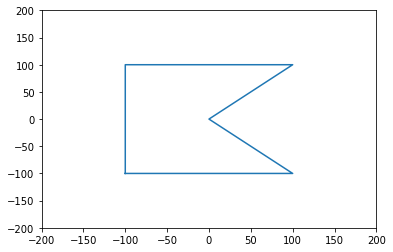

In [90]:
A = [
    [-100, -100, 1],
    [-100, 100, 1],
    [100, 100, 1],
    [0, 0, 1],
    [100, -100, 1],
    [-100, -100, 1]
    ]
A = np.array(A)
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

In [91]:
TransformArray = np.array([
    [1, 0, 300],
    [0, 1, 200],
    [0, 0, 1]
])

In [92]:
B = []
for point in A:
  new_point=np.dot(TransformArray,np.transpose(point))
  B.append(new_point)
print(B)

[array([200, 100,   1]), array([200, 300,   1]), array([400, 300,   1]), array([300, 200,   1]), array([400, 100,   1]), array([200, 100,   1])]


Уменьшить объект в два раза.

[[-50 -50   0]
 [-50  50   0]
 [ 50  50   0]
 [  0   0   0]
 [ 50 -50   0]
 [-50 -50   0]]


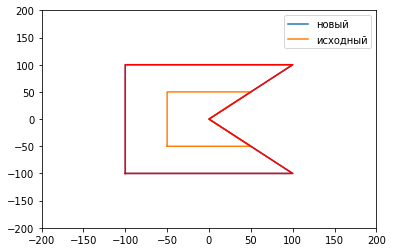

In [98]:
A = [
    [-100, -100, 1],
    [-100, 100, 1],
    [100, 100, 1],
    [0, 0, 1],
    [100, -100, 1],
    [-100, -100, 1]
    ]
A = np.array(A)
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])


TransformArray = np.array([
    [0.5, 0, 0],
    [0, 0.5, 0],
    [0, 0, 0.5]
])


B = []
for point in A:
  new_point=np.dot(TransformArray,np.transpose(point))
  B.append(new_point)
B = np.array(B).astype(int)
print(B)

x = B[:,0]
y = B[:,1]
plt.plot(x, y)
x = A[:,0]
y = A[:,1]
plt.plot(x, y, color='r')
plt.ylim([-200, 200])
plt.xlim([-200, 200])
plt.legend(['новый', 'исходный'])

Повернуть на 130 градусов.

[[ 134   42    1]
 [  42 -134    1]
 [-134  -42    1]
 [   0    0    1]
 [ -42  134    1]
 [ 134   42    1]]


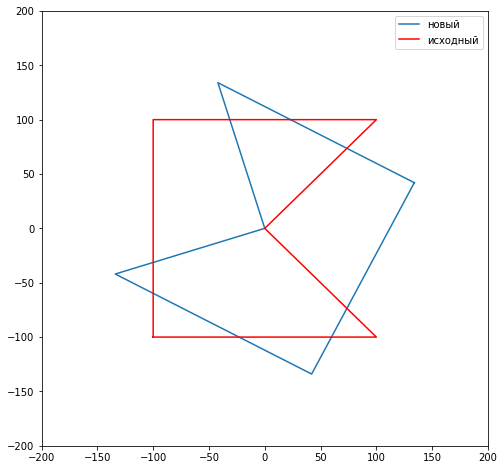

In [103]:
from math import cos, sin, pi

theta = 30 * 130/pi
TransformArray = np.array([
    [cos(theta), sin(theta), 0],
    [-sin(theta), cos(theta), 0],
    [0, 0, 1]
])

B = []
for point in A:
  new_point=np.dot(TransformArray,np.transpose(point))
  B.append(new_point)
B = np.array(B).astype(int)
print(B)

plt.figure(
    figsize=(8, 8),
    )
x = B[:,0]
y = B[:,1]
plt.plot(x, y)
x = A[:,0]
y = A[:,1]
plt.plot(x, y, color='r')
plt.ylim([-200, 200])
plt.xlim([-200, 200])
plt.legend(['новый', 'исходный'])

Отразить объект относительно прямой y=x

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


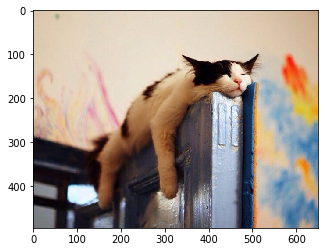

In [6]:
def url_to_image(url, readFlag=cv2.IMREAD_COLOR):
    # download the image, convert it to a NumPy array, and then read
    # it into OpenCV format
    resp = urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, readFlag)

    # return the image
    return image

url = "https://sun9-54.userapi.com/c850432/v850432958/4a7cb/11DUOryyU3U.jpg"
image = url_to_image(url)
img3 = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
plt.imshow(img3)


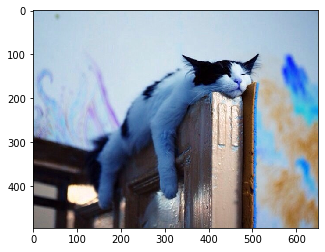

In [15]:
def mirror():
    image = url_to_image(url)
    x, y = image.size
    for i in range(x // 2):
        for j in range(y):
            p[i, j], p[y - 1 - i, j] = p[y - 1 - i, j], p[i, j]
            
plt.imshow(image)

###### Немного не понял как отразить.

Выполнить смещение объекта и масштабирование (применить 2 матрицы трансформаций).

Смещение на (200, 300) и масштабирование на (0.5, 1,2)

[array([100, 200,   1]), array([100, 400,   1]), array([300, 400,   1]), array([200, 300,   1]), array([300, 200,   1]), array([100, 200,   1])]
[[ -50 -100    2]
 [ -50  100    2]
 [  50  100    2]
 [   0    0    2]
 [  50 -100    2]
 [ -50 -100    2]]


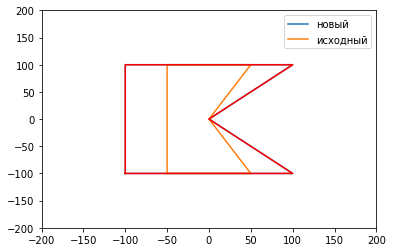

In [105]:
A = [
    [-100, -100, 1],
    [-100, 100, 1],
    [100, 100, 1],
    [0, 0, 1],
    [100, -100, 1],
    [-100, -100, 1]
    ]
A = np.array(A)
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

TransformArray = np.array([
    [1, 0, 200],
    [0, 1, 300],
    [0, 0, 1]
])

B = []
for point in A:
  new_point=np.dot(TransformArray,np.transpose(point))
  B.append(new_point)
print(B)

TransformArray = np.array([
    [0.5, 0, 0],
    [0, 1, 0],
    [0, 0, 2]
])

B = []
for point in A:
  new_point=np.dot(TransformArray,np.transpose(point))
  B.append(new_point)
B = np.array(B).astype(int)
print(B)

x = B[:,0]
y = B[:,1]
plt.plot(x, y)
x = A[:,0]
y = A[:,1]
plt.plot(x, y, color='r')
plt.ylim([-200, 200])
plt.xlim([-200, 200])
plt.legend(['новый', 'исходный'])